**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: Rafael Mandujano Nuñez
*   MATRÍCULA: A00824644

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
DIR = "/content/drive/MyDrive/Ciencia de datos/Actividad 6"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
cars_df = pd.read_csv('/content/drive/MyDrive/Ciencia de datos/Actividad 6/vehicles.csv')
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [ ]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `long`.


In [ ]:
df = cars_df.drop(['id', 'VIN', 'url', 'image_url', 'description', 'posting_date', 'lat', 'long'], axis=1)
df

,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state
0,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,NaN,wy
426876,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,NaN,wy
426877,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,NaN,wy
426878,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,NaN,wy


1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [ ]:
num_registros = df.shape[0]
num_columnas = df.shape[1]
print(f"El dataframe tiene {num_registros} registros y {num_columnas} columnas")

El dataframe tiene 426880 registros y 18 columnas


## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://www.quora.com/How-much-missing-data-is-too-much-1

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [ ]:
Faltantes = (df.isnull().sum()/df.shape[0])*100
Faltantes

,0
region,0.000000
region_url,0.000000
price,0.000000
year,0.282281
manufacturer,4.133714
model,1.236179
condition,40.785232
cylinders,41.622470
fuel,0.705819
odometer,1.030735


In [ ]:
df_70 = df.dropna(thresh=num_registros*0.7, axis=1)
columnas_eliminadas = num_columnas - df_70.shape[1]
print(f"Se eliminaron {columnas_eliminadas} columnas")

Se eliminaron 6 columnas


Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [ ]:
df_clean = df_70.dropna(subset=df_70.columns[df_70.isnull().mean() < 0.05])
Porcentaje_eliminado = (num_registros - df_clean.shape[0])/num_registros
print(f"Se eliminaron {Porcentaje_eliminado*100}% de los registros iniciales")

Se eliminaron 8.7321964017991% de los registros iniciales


2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [ ]:
df_clean.isnull().sum()

,0
region,0
region_url,0
price,0
year,0
manufacturer,0
model,0
fuel,0
odometer,0
title_status,0
transmission,0


In [ ]:
df_final = df_clean.fillna(df_clean.mode().iloc[0])
df_final.isnull().sum()

,0
region,0
region_url,0
price,0
year,0
manufacturer,0
model,0
fuel,0
odometer,0
title_status,0
transmission,0


## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'odometer'}>, <Axes: >]], dtype=object)

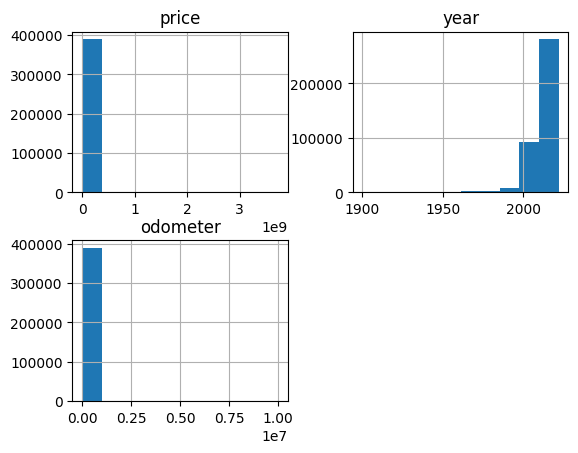

In [ ]:
df_final.hist(['price', 'year', 'odometer'])

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

In [ ]:
df_final['age'] = 2025 - df_final['year']
df_final.drop(columns=['year'], inplace=True, axis=1)

array([[<Axes: title={'center': 'age'}>]], dtype=object)

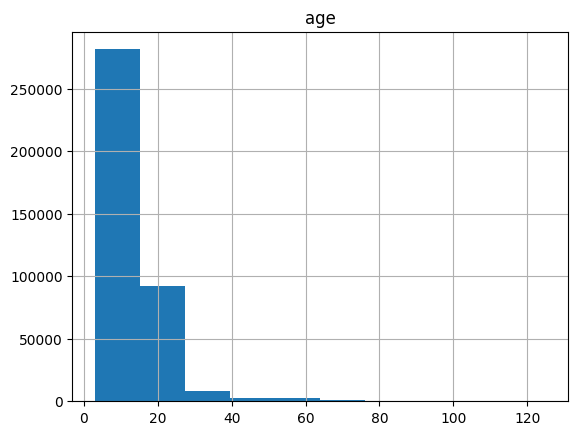

In [ ]:
df_final.hist(['age'])

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

<Axes: ylabel='odometer'>

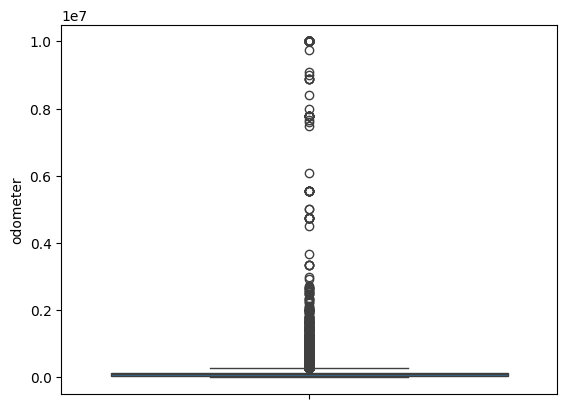

In [ ]:
sns.boxplot(y=df_final['odometer'])

<Axes: ylabel='price'>

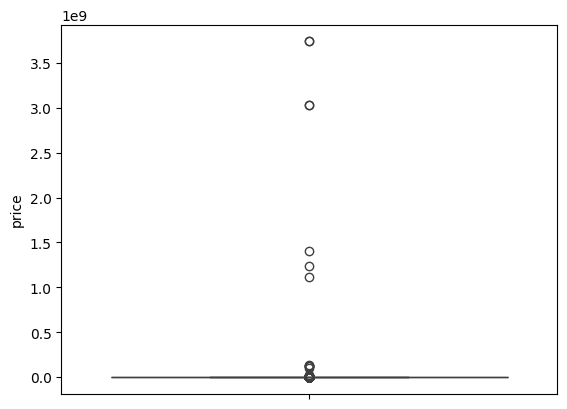

In [ ]:
sns.boxplot(y=df_final['price'])

<Axes: ylabel='age'>

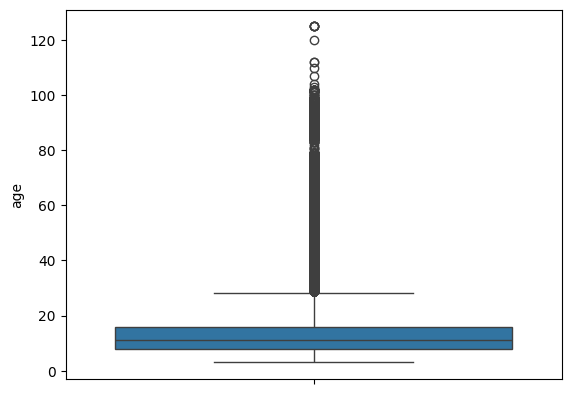

In [ ]:
sns.boxplot(y=df_final['age'])

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se han eliminado en total hasta ahora?

In [ ]:
def detectar_outliers_iqr(df_final, columna):

    Q1 = df_final[columna].quantile(0.25)
    Q3 = df_final[columna].quantile(0.75)
    IQR = Q3 - Q1  #

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df_final[(df_final[columna] < limite_inferior) | (df_final[columna] > limite_superior)]

    return outliers

In [ ]:
variables = ['price', 'age', 'odometer']

for var in variables:
    outliers = detectar_outliers_iqr(df_final, var)
    porcentaje_outliers = len(outliers) / len(df_final) * 100
    print(f"📌 {var}: {porcentaje_outliers:.2f}% de valores atípicos encontrados.")

    df_final = df_final[~df_final.index.isin(outliers.index)]

📌 price: 1.71% de valores atípicos encontrados.
📌 age: 3.07% de valores atípicos encontrados.
📌 odometer: 0.74% de valores atípicos encontrados.


In [ ]:
Porcentaje_eliminado_hasta_ahora = (num_registros - df_final.shape[0])/num_registros
print(f"Se eliminaron {Porcentaje_eliminado_hasta_ahora*100}% de los registros iniciales")

Se eliminaron 13.69166979010495% de los registros iniciales


4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'odometer'}>, <Axes: >]], dtype=object)

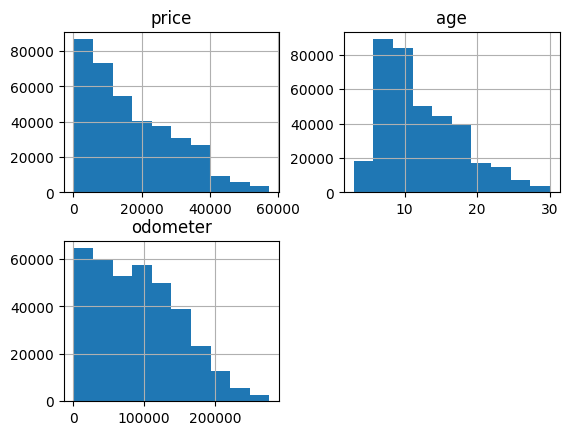

In [ ]:
df_final.hist(['price', 'age', 'odometer'])

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


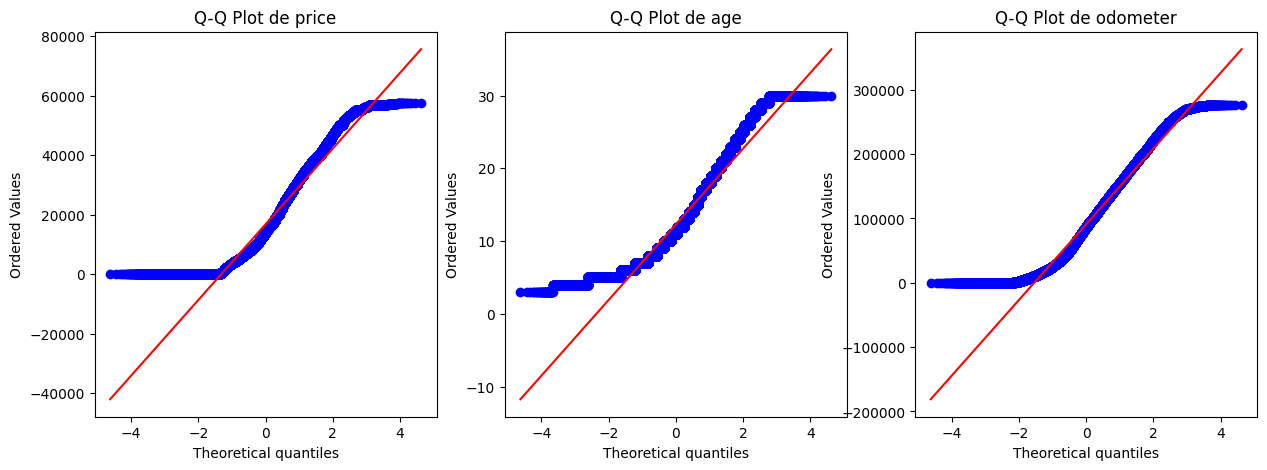

In [ ]:
variables = ['price', 'age', 'odometer']

plt.figure(figsize=(15, 5))

for i, var in enumerate(variables):
    plt.subplot(1, 3, i + 1)
    stats.probplot(df_final[var], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot de {var}')

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

Recuerda que en `PowerTransformer()` el parámetro `standardize` por defecto es `True`. Con esto, después de hacer la transformación, el resultado se escala con *Z-score*, haciendo que la media sea 0 y la desviación estándar 1. Como en el ejercicio 6 ocuparás Min-Max para escalar, haz `standardize=False` para omitir el escalamiento en esta fase.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Coloca el resultado en un dataframe denominado `transf_df` que contenga sólo las variables transformadas.

In [ ]:
from sklearn.preprocessing import PowerTransformer

variables = ['price', 'odometer']

pt = PowerTransformer(method='yeo-johnson', standardize=False)
df_final[variables] = pt.fit_transform(df_final[variables])

print(df_final[variables].describe())

               price       odometer
count  368433.000000  368433.000000
mean      127.199568     741.204351
std        59.562099     304.952016
min         0.000000       0.000000
25%        91.984513     507.898117
50%       132.797731     775.412475
75%       173.369238     972.991934
max       243.656581    1435.305930


5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

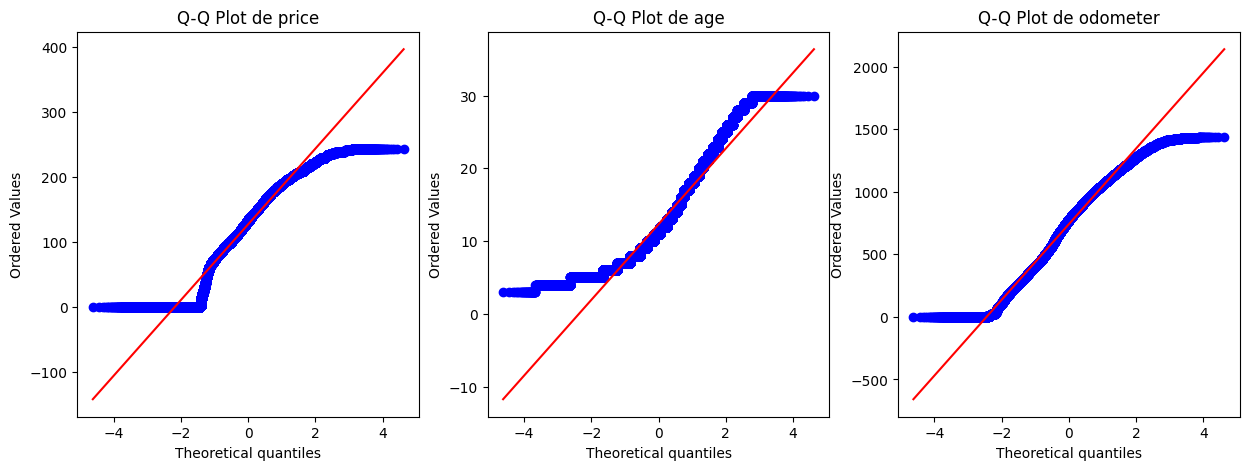

In [ ]:
variables = ['price', 'age', 'odometer']

plt.figure(figsize=(15, 5))

for i, var in enumerate(variables):
    plt.subplot(1, 3, i + 1)
    stats.probplot(df_final[var], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot de {var}')


trans_df=df_final.copy()

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Coloca el resultado en un dataframe denominado `minmax_df`.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
trans_df[variables] = scaler.fit_transform(trans_df[variables])

print(trans_df[variables].describe())

minmax_df = trans_df[variables].describe()

               price            age       odometer
count  368433.000000  368433.000000  368433.000000
mean        0.522044       0.345128       0.516409
std         0.244451       0.199062       0.212465
min         0.000000       0.000000       0.000000
25%         0.377517       0.185185       0.353861
50%         0.545020       0.296296       0.540242
75%         0.711531       0.481481       0.677899
max         1.000000       1.000000       1.000000


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

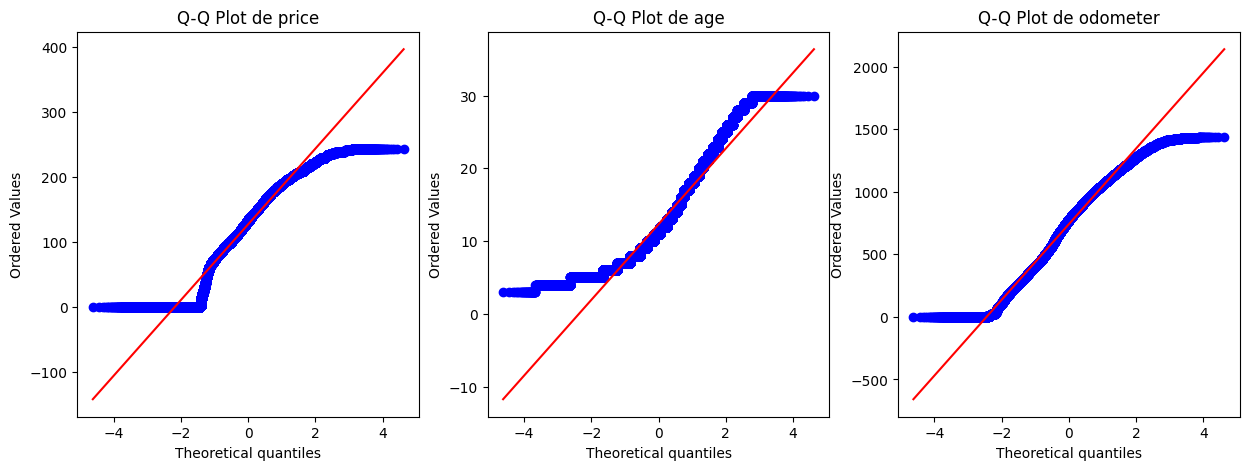

In [ ]:
plt.figure(figsize=(15, 5))

for i, var in enumerate(variables):
    plt.subplot(1, 3, i + 1)
    stats.probplot(df_final[var], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot de {var}')


trans_df=df_final.copy()

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [ ]:
trans_df.describe(include='object')

,region,region_url,manufacturer,model,fuel,title_status,transmission,type,state
count,368433,368433,368433,368433,368433,368433,368433,368433,368433
unique,404,413,40,19314,5,6,3,13,51
top,columbus,https://grandrapids.craigslist.org,ford,f-150,gas,clean,automatic,sedan,ca
freq,3201,2745,62162,7477,313944,356757,293338,155206,42333


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente. Una variable es considerada de alta cardinalidad cuando tiene cientos de valores únicos.

In [ ]:
cardinalidad = 100
highly_cardinal_variables = []
few_cardinal_variables = []
for col in trans_df.select_dtypes(include=['object']).columns:
    unique_values = trans_df[col].nunique()  # Contar valores únicos

    if unique_values > cardinalidad:
        highly_cardinal_variables.append(col)
    else:
        few_cardinal_variables.append(col)

print(f" Variables de **alta cardinalidad** ({len(highly_cardinal_variables)}): {highly_cardinal_variables}")
print(f" Variables de **baja cardinalidad** ({len(few_cardinal_variables)}): {few_cardinal_variables}")


 Variables de **alta cardinalidad** (3): ['region', 'region_url', 'model']
 Variables de **baja cardinalidad** (6): ['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state']


7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

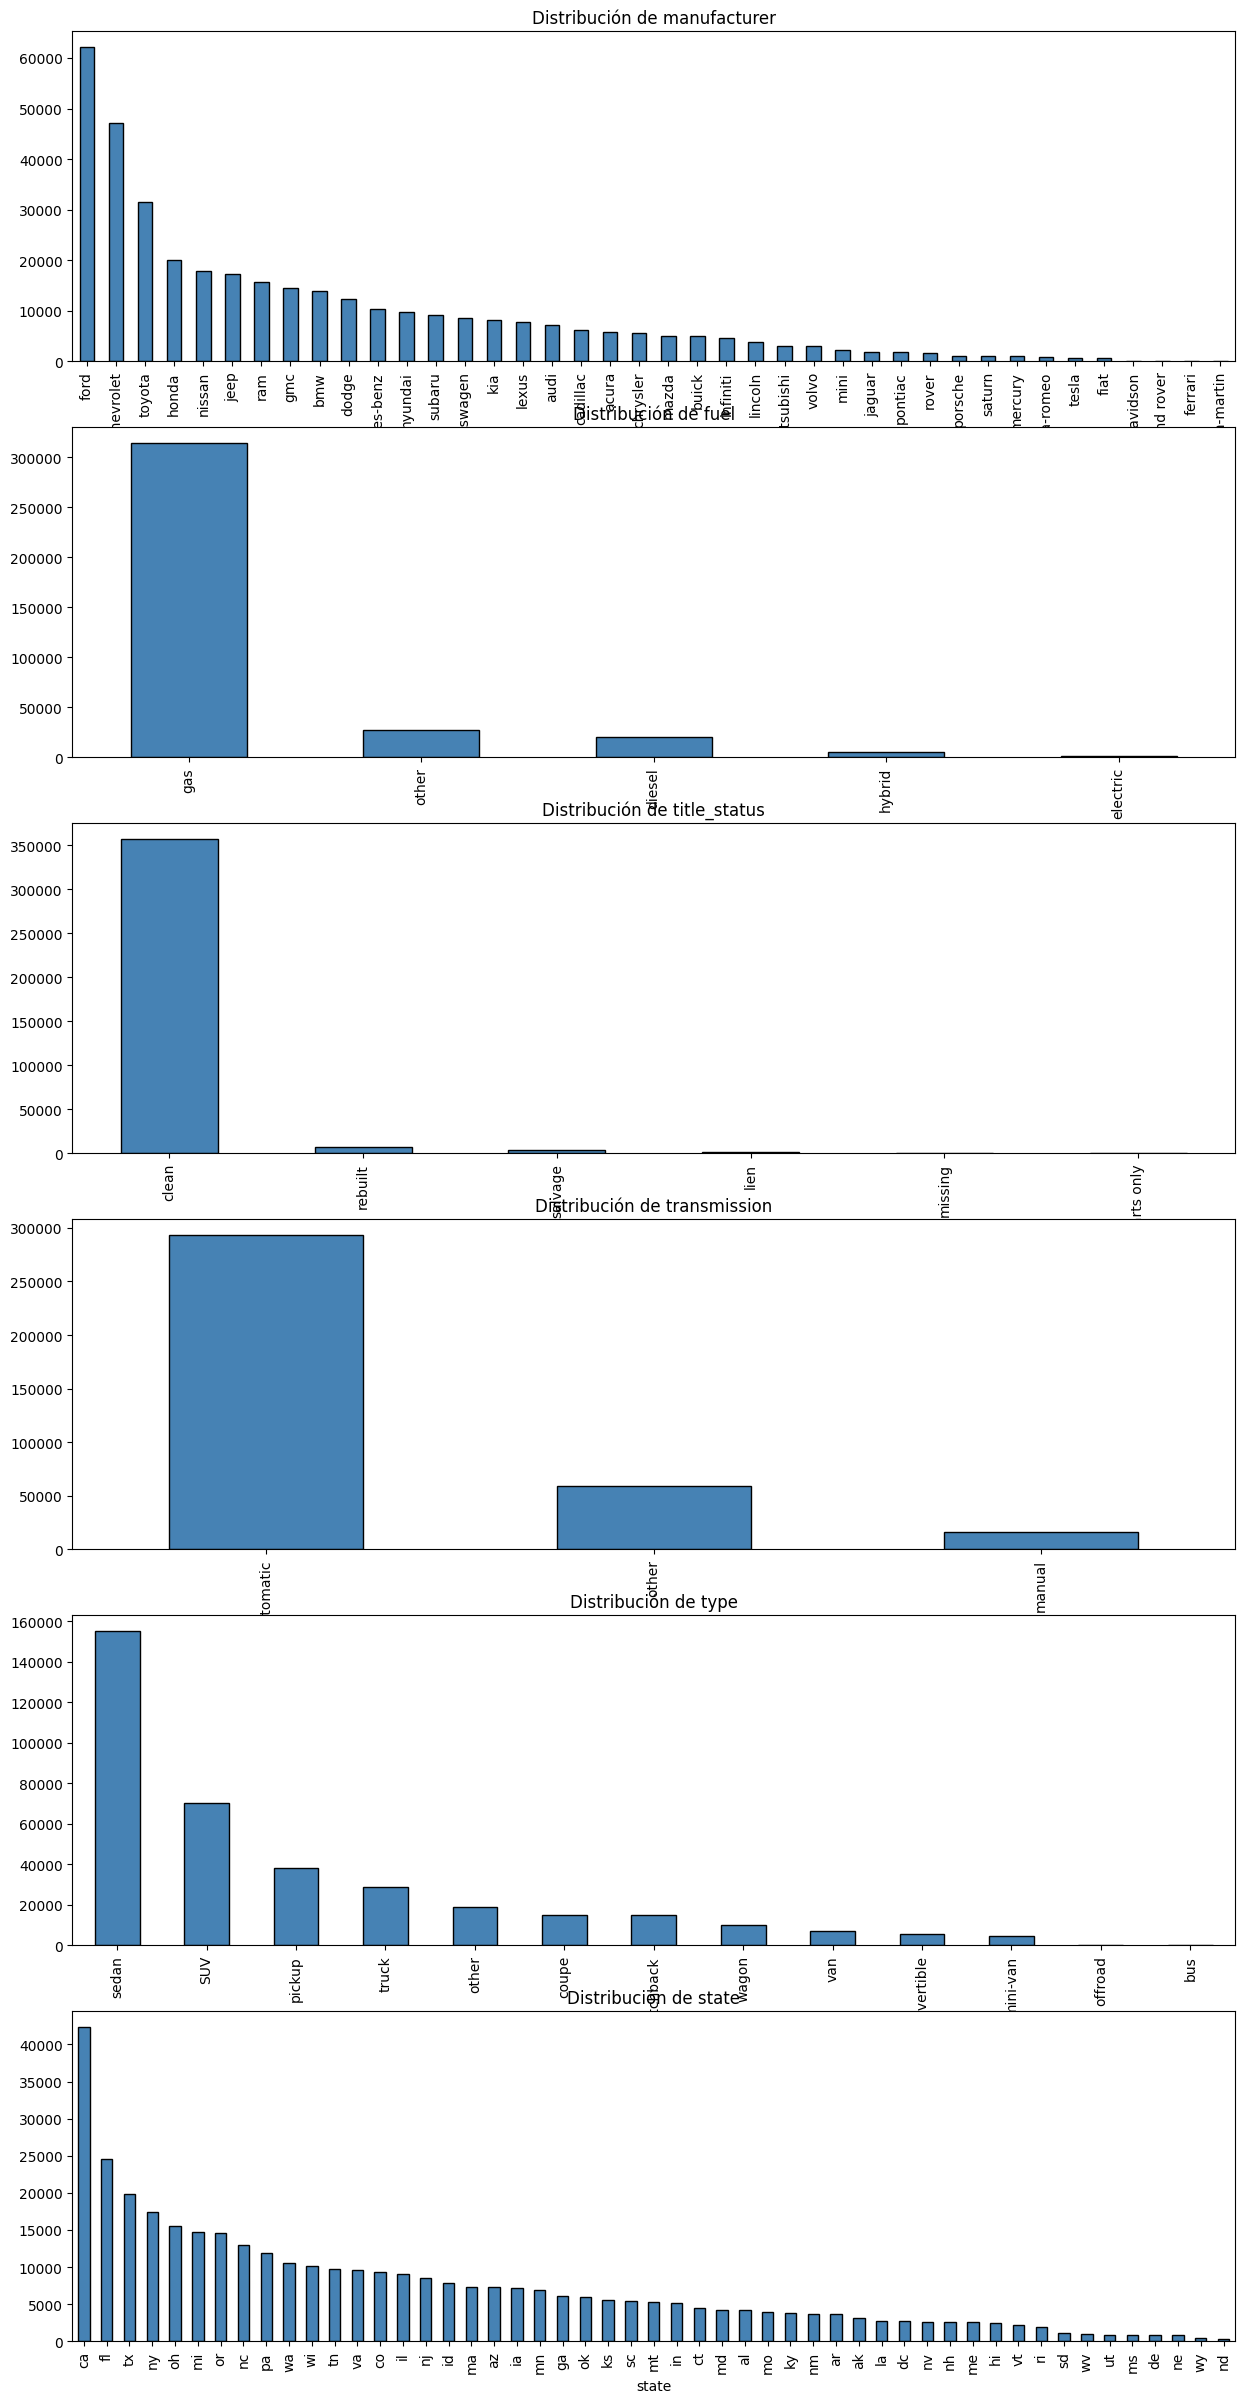

In [ ]:
plt.figure(figsize=(15, 5* len(few_cardinal_variables)))
for i, var in enumerate(few_cardinal_variables):
    plt.subplot(len(few_cardinal_variables), 1, i + 1)
    trans_df[var].value_counts().plot(kind='bar', color='steelblue', edgecolor='black')
    plt.title(f'Distribución de {var}')

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`, borrando la primera categoría (`drop='first'`). Coloca el resultado en un dataframe denominado `onehot_df`.

In [ ]:
onehot_df = pd.get_dummies(trans_df[few_cardinal_variables], drop_first=True)
print(onehot_df.head())

    manufacturer_alfa-romeo  manufacturer_aston-martin  manufacturer_audi  \
27                    False                      False              False   
28                    False                      False              False   
29                    False                      False              False   
30                    False                      False              False   
31                    False                      False              False   

    manufacturer_bmw  manufacturer_buick  manufacturer_cadillac  \
27             False               False                  False   
28             False               False                  False   
29             False               False                  False   
30             False               False                  False   
31             False               False                  False   

    manufacturer_chevrolet  manufacturer_chrysler  manufacturer_dodge  \
27                   False                  False            

9. Aplica codificación binaria a las variables en `highly_cardinal_variables`. Coloca el resultado en un dataframe denominado `binary_df`.

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
import category_encoders.binary as ce

binary_encoder = ce.BinaryEncoder(cols=highly_cardinal_variables, drop_invariant=True)
binary_df = binary_encoder.fit_transform(trans_df[highly_cardinal_variables])

print(binary_df.head())

    region_0  region_1  region_2  region_3  region_4  region_5  region_6  \
27         0         0         0         0         0         0         0   
28         0         0         0         0         0         0         0   
29         0         0         0         0         0         0         0   
30         0         0         0         0         0         0         0   
31         0         0         0         0         0         0         0   

    region_7  region_8  region_url_0  ...  model_5  model_6  model_7  model_8  \
27         0         1             0  ...        0        0        0        0   
28         0         1             0  ...        0        0        0        0   
29         0         1             0  ...        0        0        0        0   
30         0         1             0  ...        0        0        0        0   
31         0         1             0  ...        0        0        0        0   

    model_9  model_10  model_11  model_12  model_13  mod

10. Concatena los dataframes obtenidos: `minmax_df` (cuyas variables numéricas ya están transformadas y escaladas) y las codificaciones anteriores (`onehot_df` y `binary_df`). Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [ ]:
final_df = pd.concat([minmax_df, onehot_df, binary_df], axis=1)

print(final_df.head())

               price            age       odometer manufacturer_alfa-romeo  \
count  368433.000000  368433.000000  368433.000000                     NaN   
mean        0.522044       0.345128       0.516409                     NaN   
std         0.244451       0.199062       0.212465                     NaN   
min         0.000000       0.000000       0.000000                     NaN   
25%         0.377517       0.185185       0.353861                     NaN   

      manufacturer_aston-martin manufacturer_audi manufacturer_bmw  \
count                       NaN               NaN              NaN   
mean                        NaN               NaN              NaN   
std                         NaN               NaN              NaN   
min                         NaN               NaN              NaN   
25%                         NaN               NaN              NaN   

      manufacturer_buick manufacturer_cadillac manufacturer_chevrolet  ...  \
count                NaN        